- Install the necessary libraries
- Explore how to inspect elements and view the source of a webpage
- 

In [3]:
import bs4

## Grabbing a Title

In [4]:
import requests

In [5]:
result = requests.get("http://www.example.com")

In [7]:
type(result)

requests.models.Response

In [12]:
result.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

- Use beautiful soup library to parse this.

In [13]:
import bs4

In [14]:
soup = bs4.BeautifulSoup(result.text, "lxml") 
# lxml is the engine we are using to parse through the html document.
# lxml goes through the HTML content to go through the CSS class, CSS id, different HTML tags and elements.

In [15]:
soup

<!DOCTYPE html>
<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is for use in illustrative examples

In [18]:
# Lets's grab the title..

title = soup.select('title')

In [21]:
title

[<title>Example Domain</title>]

In [24]:
soup.select('title')[0].getText()

'Example Domain'

In [27]:
soup.select('h1')[0].getText()

'Example Domain'

In [38]:
soup.select('p')[1]

<p><a href="https://www.iana.org/domains/example">More information...</a></p>

In [39]:
soup.select('p')[1].getText()

'More information...'

In [45]:
val = soup.select('p')[1]

In [91]:
val

[<a href="https://www.iana.org/domains/example">More information...</a>]

In [94]:
val_text = val[0]

In [95]:
val_text['href']

'https://www.iana.org/domains/example'

## Grabbing a Class

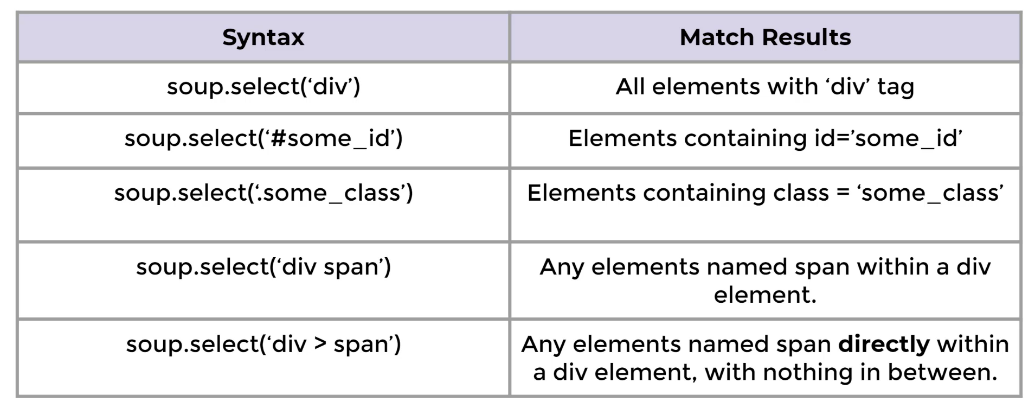

In [69]:
res = requests.get('https://en.wikipedia.org/wiki/Grace_Hopper')

In [70]:
soup = bs4.BeautifulSoup(res.text,"lxml")

In [72]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Grace Hopper - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"46ccc386-7500-449e-9c2a-b4bd22046620","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Grace_Hopper","wgTitle":"Grace Hopper","wgCurRevisionId":971610140,"wgRevisionId":971610140,"wgArticleId":12590,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All pages needing factual verification","Wikipedia articles needing factual verification from November 2013","Articles with short description","Short description is different

In [73]:
soup.select('.toctext')

[<span class="toctext">Early life and education</span>,
 <span class="toctext">Career</span>,
 <span class="toctext">World War II</span>,
 <span class="toctext">UNIVAC</span>,
 <span class="toctext">COBOL</span>,
 <span class="toctext">Standards</span>,
 <span class="toctext">Retirement</span>,
 <span class="toctext">Post-retirement</span>,
 <span class="toctext">Anecdotes</span>,
 <span class="toctext">Death</span>,
 <span class="toctext">Dates of rank</span>,
 <span class="toctext">Awards and honors</span>,
 <span class="toctext">Military awards</span>,
 <span class="toctext">Other awards</span>,
 <span class="toctext">Legacy</span>,
 <span class="toctext">Places</span>,
 <span class="toctext">Programs</span>,
 <span class="toctext">In popular culture</span>,
 <span class="toctext">Grace Hopper Celebration of Women in Computing</span>,
 <span class="toctext">Notes</span>,
 <span class="toctext">Obituary notices</span>,
 <span class="toctext">See also</span>,
 <span class="toctext">Re

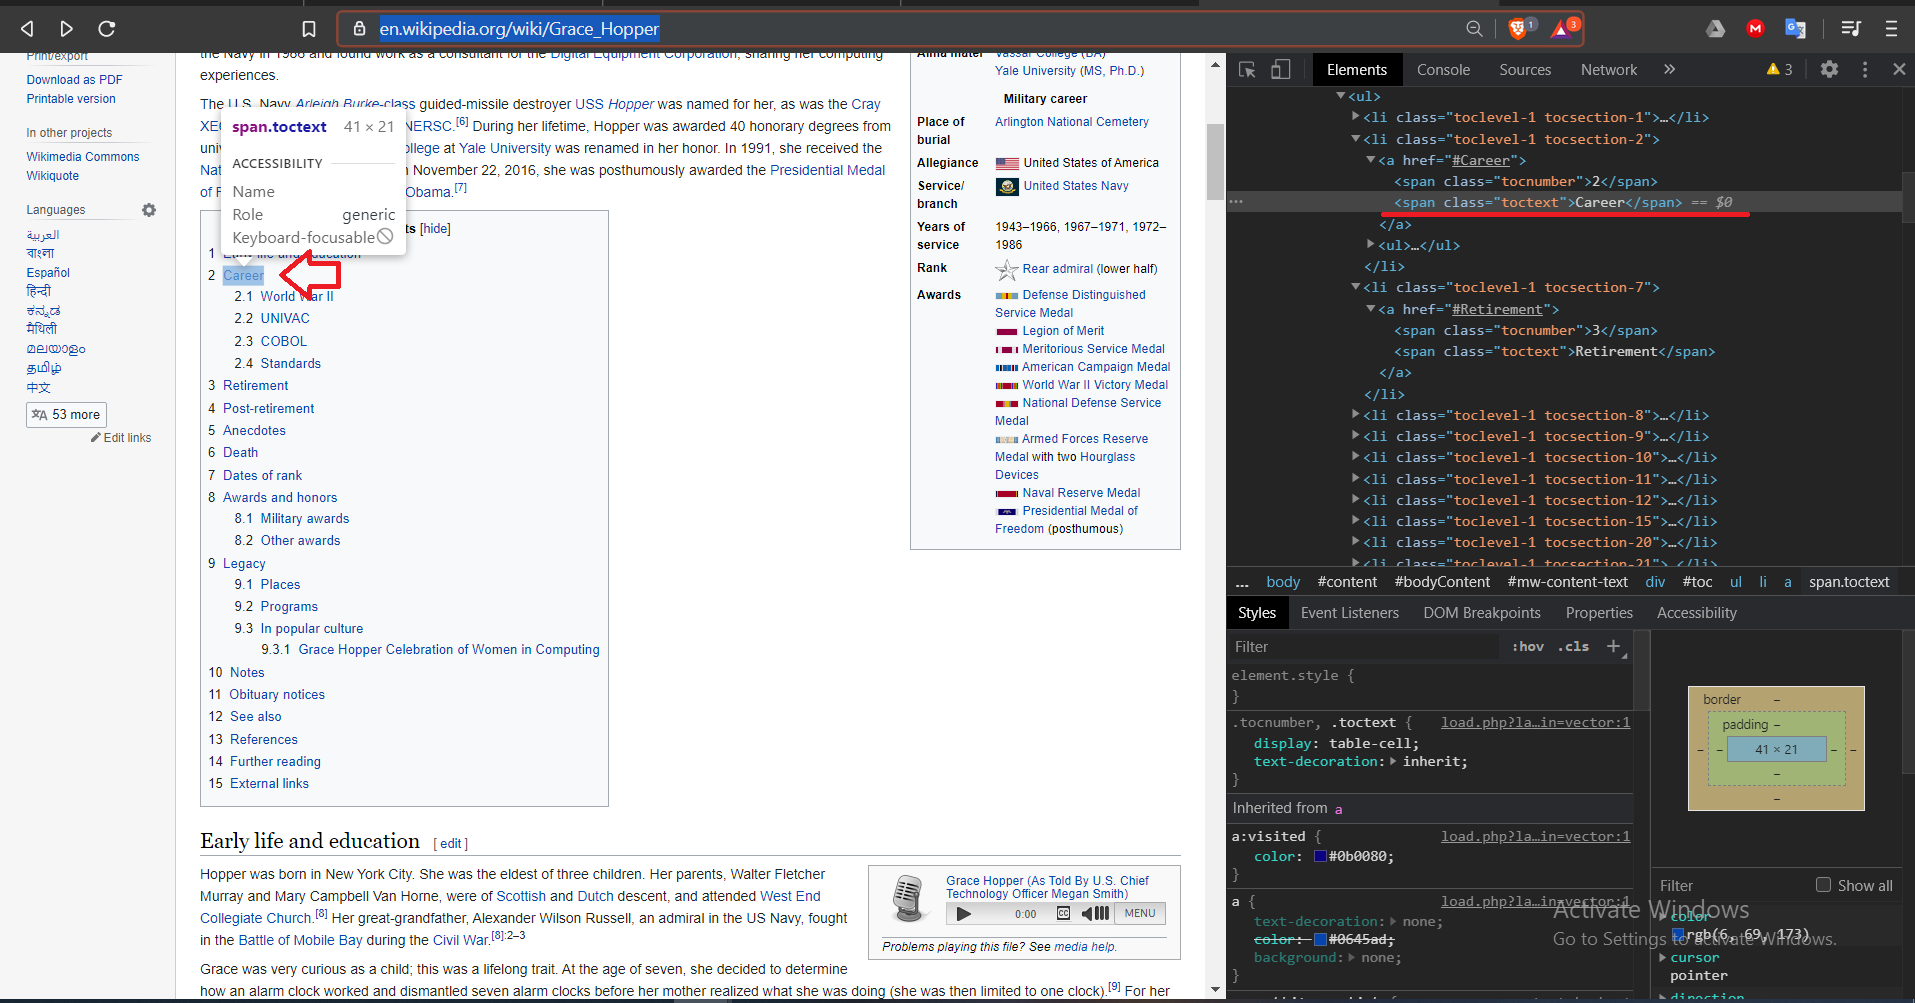

In [74]:
soup.select('.toctext')[0].getText()

'Early life and education'

In [79]:
toc = [] # table of contents
for i in soup.select('.toctext'):
    toc.append(i.text)
    #print(i.getText())

In [80]:
toc

['Early life and education',
 'Career',
 'World War II',
 'UNIVAC',
 'COBOL',
 'Standards',
 'Retirement',
 'Post-retirement',
 'Anecdotes',
 'Death',
 'Dates of rank',
 'Awards and honors',
 'Military awards',
 'Other awards',
 'Legacy',
 'Places',
 'Programs',
 'In popular culture',
 'Grace Hopper Celebration of Women in Computing',
 'Notes',
 'Obituary notices',
 'See also',
 'References',
 'Further reading',
 'External links']

## Grabbing an Image

- Images on a website have their own url link ending .jpg / .png
- Beautiful soup can scan a page and locate < img > tags and grab the URLs

#### Grabbing images from Wiki page - Deep Blue (Chess)
https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)

In [81]:
res = requests.get('https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)')

In [83]:
res.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Deep Blue (chess computer) - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"16f1d9ef-2635-47ae-86c1-0dbf78ab55a6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Deep_Blue_(chess_computer)","wgTitle":"Deep Blue (chess computer)","wgCurRevisionId":970421417,"wgRevisionId":970421417,"wgArticleId":49387,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit url","Webarchive template wayback links","CS1 errors: missing periodical","Articles with short description","

In [84]:
soup = bs4.BeautifulSoup(res.text,"lxml")

In [85]:
soup.select('img')

[<img alt="Chess Programming.svg" data-file-height="60" data-file-width="60" decoding="async" height="150" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/150px-Chess_Programming.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/225px-Chess_Programming.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/300px-Chess_Programming.svg.png 2x" width="150"/>,
 <img alt="" class="thumbimage" data-file-height="601" data-file-width="400" decoding="async" height="331" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/330px-Deep_Blue.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/b/be/Deep_Blue.jpg 2x" width="220"/>,
 <img alt="" class="thumbimage" data-file-height="600" data-file-width="800" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb

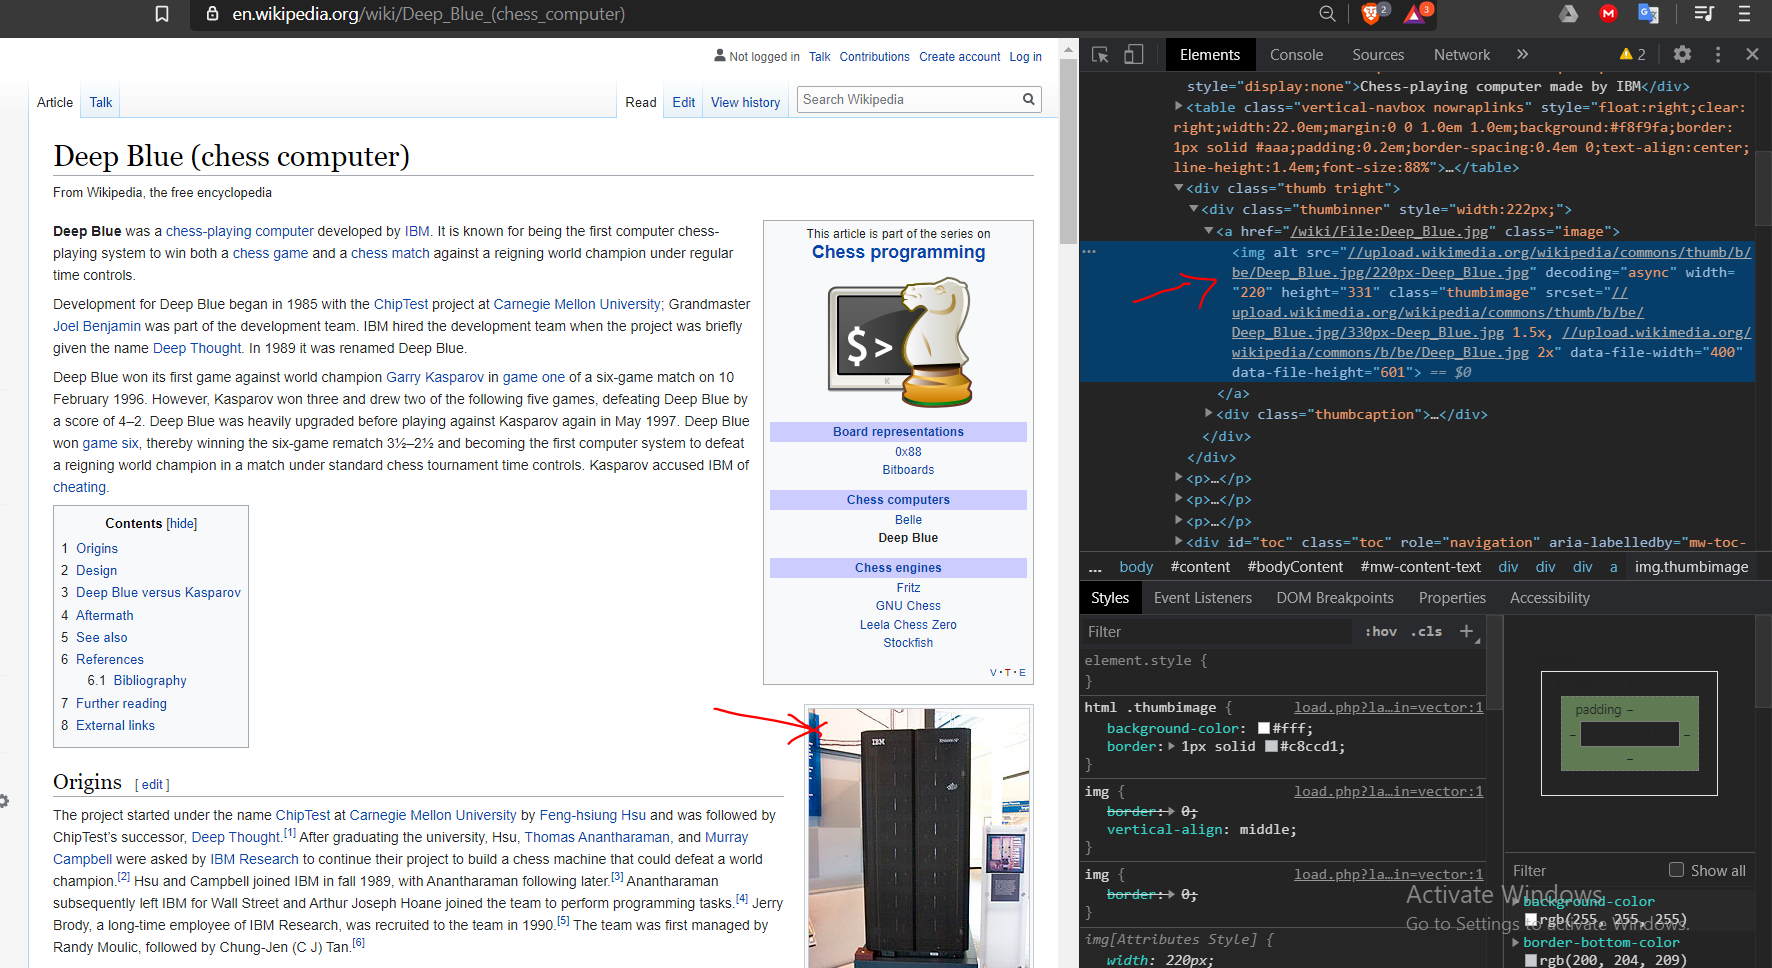

In [86]:
soup.select('img')[0]

<img alt="Chess Programming.svg" data-file-height="60" data-file-width="60" decoding="async" height="150" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/150px-Chess_Programming.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/225px-Chess_Programming.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/300px-Chess_Programming.svg.png 2x" width="150"/>

- In the above screenshot, this images within the actual content in the page is associated with a class called thumb image.
- The below query gives 2 image results. One is the IBM computer and the other is Kasparov.

In [87]:
soup.select('.thumbimage')

[<img alt="" class="thumbimage" data-file-height="601" data-file-width="400" decoding="async" height="331" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/330px-Deep_Blue.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/b/be/Deep_Blue.jpg 2x" width="220"/>,
 <img alt="" class="thumbimage" data-file-height="600" data-file-width="800" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/330px-Kasparov_Magath_1985_Hamburg-2.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/440px-Kasparov_Magath_1985_Hamburg-2.png 2x" width="220"/>]

- Download the image.

In [88]:
computer = soup.select('.thumbimage')[0]

In [89]:
computer

<img alt="" class="thumbimage" data-file-height="601" data-file-width="400" decoding="async" height="331" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/330px-Deep_Blue.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/b/be/Deep_Blue.jpg 2x" width="220"/>

- The above data is considered like a ditionary, since the data type of computer is 'tag'. So individual elements within this can be captured like a dictionary

In [90]:
computer['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg'

In [96]:
computer['class']

['thumbimage']

##### the above source can be displayed here

<img src = "//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg">


In [98]:
# Downloading the image

img = requests.get('https:' + computer['src'])

In [103]:
img.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x00CFile source: http://commons.wikimedia.org/wiki/File:Deep_Blue.jpg\xff\xe2\x02@ICC_PROFILE\x00\x01\x01\x00\x00\x020ADBE\x02\x10\x00\x00mntrRGB XYZ \x07\xcf\x00\x06\x00\x03\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00none\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-ADBE\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ncprt\x00\x00\x00\xfc\x00\x00\x002desc\x00\x00\x010\x00\x00\x00kwtpt\x00\x00\x01\x9c\x00\x00\x00\x14bkpt\x00\x00\x01\xb0\x00\x00\x00\x14rTRC\x00\x00\x01\xc4\x00\x00\x00\x0egTRC\x00\x00\x01\xd4\x00\x00\x00\x0ebTRC\x00\x00\x01\xe4\x00\x00\x00\x0erXYZ\x00\x00\x01\xf4\x00\x00\x00\x14gXYZ\x00\x00\x02\x08\x00\x00\x00\x14bXYZ\x00\x00\x02\x1c\x00\x00\x00\x14text\x00\x00\x00\x00Copyright 1999 Adobe System

In [105]:
# This gives a raw content in a binary format

In [106]:
f = open('my_comp_img.jpg', mode = 'wb')

In [107]:
f.write(img.content)

16806

In [108]:
f.close()